# 2.11 Feature Engineering

## 1. Introduction
The process of feature engineering involves manipulating, transforming, and selecting raw data into features that can be used in statistical analysis and prediction.

Key types of features include:

### Statistical features

Statistical features summarize the distribution of data values, providing insights into the central tendency, dispersion, and shape of the dataset.

* **Mean**: Average value of the data points.
* **Variance/Standard Deviation**: Measure of the spread of the data.
* **Skewness**: Asymmetry in the distribution of values.
* **Kurtosis**: "Tailedness" of the distribution.
* **Percentiles** : Threshold values for different segments of the distribution.

### Temporal Features
Temporal features focus on the time-dependent patterns within the series.

* **Autocorrelation**: Correlation of a time series with a lagged version of itself.
* **Trend**: Long-term increase or decrease in the data.
* **Seasonality**: Regular patterns that repeat over a specific period.
* **Change Points**: Locations where statistical properties of the series change significantly.


The autocorrelation of the seasonal component is 0.63


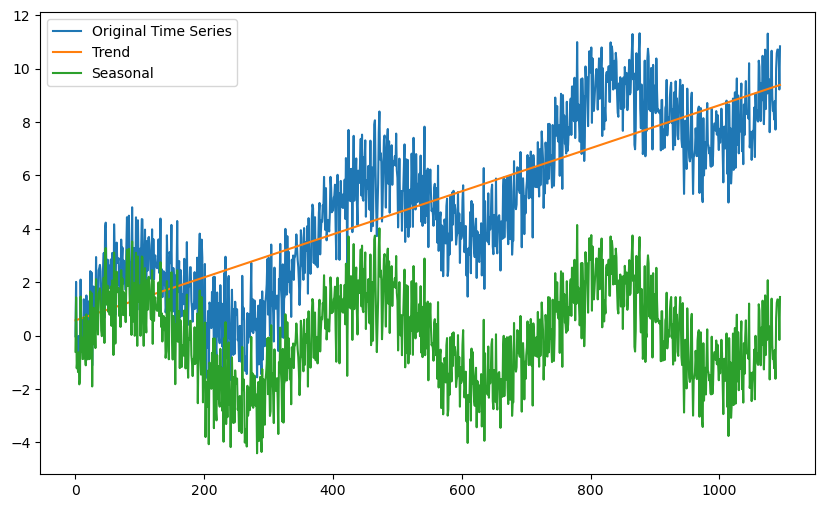

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a time series with trend and seasonality
t = np.arange(0, 365*3)
seasonal_series = np.random.randn(3*365) + np.linspace(0, 10, 3*365) + \
        2* np.sin(2 * np.pi * np.linspace(0, 3, 3*365))

# fit a trend using least squares regression
t = np.arange(len(seasonal_series))
trend = np.polyfit(t, seasonal_series, 1)[0] * t + np.polyfit(t, seasonal_series, 1)[1]
# calculate the seasonal component by subtracting the trend
seasonal = seasonal_series - trend
# calculate the autocorrelation of the seasonal component
autocorr = np.corrcoef(seasonal[:-1], seasonal[1:])[0, 1]
print(f'The autocorrelation of the seasonal component is {autocorr:.2f}')

# Plot the original time series, trend and seasonal components
plt.figure(figsize=(10, 6))
plt.plot(seasonal_series, label='Original Time Series')
plt.plot(trend, label='Trend')
plt.plot(seasonal, label='Seasonal')
plt.legend()


In [91]:
crap = np.random.randn(3*365) 

autocorr = np.corrcoef(crap[:-1], crap[1:])[0, 1]
print(f'The autocorrelation of the seasonal component is {autocorr:.2f}')

The autocorrelation of the seasonal component is 0.01


### Spatial features

For geospatial data, spatial features capture the relationships between different locations in an image or dataset.

* **Texture**: Patterns in the local intensity variations (e.g., smooth, rough).
* **Spatial Correlation**: Measures how similar nearby locations are in terms of intensity values. 


Text(0.5, 1.0, '2D Spatially Correlated Noise')

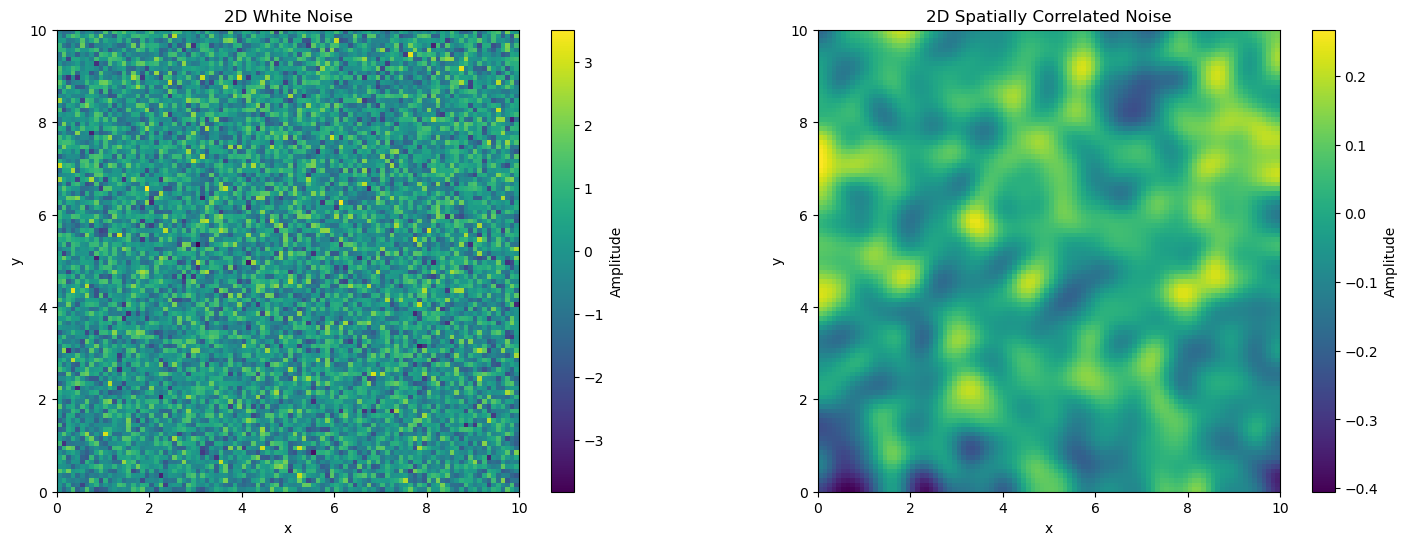

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.fft import fft2, ifft2, fftshift

# Generate a 2D grid (e.g., geospatial data, such as a topographic map)
n = 100  # Size of the grid
x = np.linspace(0, 10, n)
y = np.linspace(0, 10, n)
X, Y = np.meshgrid(x, y)

# Generate 2D white noise
white_noise_2d = np.random.normal(0, 1, (n, n))

# Generate spatially correlated noise using a Gaussian filter
spatially_correlated_noise = gaussian_filter(white_noise_2d, sigma=3)

# Plot the synthetic 2D white noise, correlated noise, and autocorrelation function
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.imshow(white_noise_2d, extent=[0, 10, 0, 10], cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Amplitude')
plt.title('2D White Noise')

# Spatially correlated noise
plt.subplot(1, 2, 2)
plt.imshow(spatially_correlated_noise, extent=[0, 10, 0, 10], cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Amplitude')
plt.title('2D Spatially Correlated Noise')

spatial correlation of the white noise

In [93]:

# Compute the 2D Fourier Transform of the spatially correlated noise
fft_white_noise = fft2(white_noise_2d)

# Compute the power spectrum
power_spectrum = np.abs(fft_white_noise) ** 2

# Compute the inverse 2D Fourier Transform of the power spectrum to get the autocorrelation function
autocorrelation_white = np.real(ifft2(power_spectrum))

# Shift the zero-frequency component to the center of the spectrum
autocorrelation_white = fftshift(autocorrelation_white)

# Normalize the autocorrelation function
autocorrelation_white /= autocorrelation_white.max()

spatial correlation of the correlated noise

In [94]:
# Compute the 2D Fourier Transform of the spatially correlated noise
fft_noise = fft2(spatially_correlated_noise)

# Compute the power spectrum
power_spectrum = np.abs(fft_noise) ** 2

# Compute the inverse 2D Fourier Transform of the power spectrum to get the autocorrelation function
autocorrelation = np.real(ifft2(power_spectrum))

# Shift the zero-frequency component to the center of the spectrum
autocorrelation = fftshift(autocorrelation)

# Normalize the autocorrelation function
autocorrelation /= autocorrelation.max()


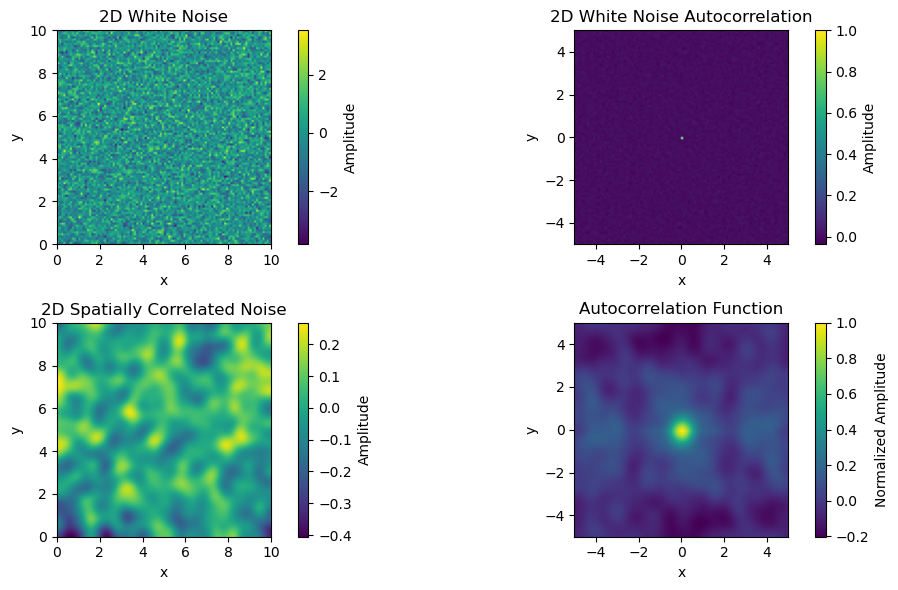

In [97]:

# Plot the synthetic 2D white noise, correlated noise, and autocorrelation function
plt.figure(figsize=(11, 6))

# White noise (unfiltered)
plt.subplot(2, 2, 1)
plt.imshow(white_noise_2d, extent=[0, 10, 0, 10], cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Amplitude')
plt.title('2D White Noise')


plt.subplot(2, 2, 2)
plt.imshow(autocorrelation_white, extent=[-5, 5, -5, 5], cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Amplitude')
plt.title('2D White Noise Autocorrelation')


# Spatially correlated noise
plt.subplot(2, 2, 3)
plt.imshow(spatially_correlated_noise, extent=[0, 10, 0, 10], cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Amplitude')
plt.title('2D Spatially Correlated Noise')

# Autocorrelation function
plt.subplot(2, 2, 4)
plt.imshow(autocorrelation, extent=[-5, 5, -5, 5], cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Normalized Amplitude')
plt.title('Autocorrelation Function')

plt.tight_layout()
plt.show()


Estimate the feature "correlation length" of the two images. The correlation length is often measured as the distance at which the autocorelation function decays to 1/e of its maximum value.

In [98]:

center = n // 2
# calculate correlation length for the white noise
autocorr_center = autocorrelation_white[center, center:]
distances = np.linspace(0, 5, center)
correlation_length_white = np.interp(1/np.e, autocorr_center[::-1], distances[::-1])

# calculate correlation length for the spatially correlated noise 
autocorr_center = autocorrelation[center, center:]
distances = np.linspace(0, 5, center)
correlation_length = np.interp(1/np.e, autocorr_center[::-1], distances[::-1])

print(f'Estimated correlation length for white noise: {correlation_length_white:.2f} and for spatially correlated noise: {correlation_length:.2f}')

Estimated correlation length for white noise: 0.06 and for spatially correlated noise: 0.66


### Fractal Features
Fractal features describe the self-similarity or complexity of the data at different scales. A common fractal feature is the Fractal Dimension, which quantifies the complexity of a dataset, especially useful in understanding geospatial structures and irregular patterns.



## 2. Seismic Time Series Data Example
This lecture will demonstrate how to automatically extract features using a popular and simple Python package, `tsfel`, to extract common time series features. We will apply this to the example of seismic waveforms recorded in the Pacific Northwest.

An example will follow.
The Pacific Northwest data includes labeled seismic waveforms for events of various origins:

- **Earthquakes**
- **Explosions** (mostly quarry blasts)
- **Surface events** (such as avalanches and landslides)
- **Seismic noise** (ambient Earth vibrations between events)

We will explore how these features vary across the four categories, or classes, of seismic events.

In [99]:
# Import modules for seismic data and feature extraction

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.stats as st
import os
import h5py # for reading .h5 files

We download 2 files from the class storage: a CSV file with the waveforms themselves as an HDF5 file and their associated metadata as a CSV file:

In [100]:
#make sure to install wget
!pip install wget
import wget


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [102]:
wget.download("https://dasway.ess.washington.edu/shared/niyiyu/PNW-ML/miniPNW_metadata.csv")
wget.download("https://dasway.ess.washington.edu/shared/niyiyu/PNW-ML/miniPNW_waveforms.hdf5")

'miniPNW_waveforms.hdf5'

## Metadata

We first read the metadata and arange them into a Pandas Data frame

In [103]:
import pandas as pd
# Handle irregular rows by skipping them
df = pd.read_csv("miniPNW_metadata.csv")
# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_type,source_depth_km,preferred_source_magnitude,preferred_source_magnitude_type,preferred_source_magnitude_uncertainty,...,trace_S_onset,trace_P_onset,trace_snr_db,year,source_type_pnsn_label,source_local_magnitude,source_local_magnitude_uncertainty,source_duration_magnitude,source_duration_magnitude_uncertainty,source_hand_magnitude
0,0,uw61669232,2020-09-07T03:44:14.690000Z,46.560,-119.797,earthquake,23.300,1.30,ml,0.241000,...,impulsive,impulsive,-1.444|2.612|9.921,2020.0,eq,1.30,0.241273,1.17,0.187840,NaN
1,1,uw60888282,2014-10-08T15:39:31.330000Z,45.371,-121.708,earthquake,-0.947,1.67,ml,0.128000,...,impulsive,impulsive,0.368|3.526|5.981,2014.0,eq,1.67,0.128000,1.63,0.099000,NaN
2,2,uw61361706,2017-12-30T04:37:46.870000Z,46.165,-120.543,earthquake,13.520,2.46,ml,0.158000,...,impulsive,emergent,11.274|13.32|15.828,2017.0,eq,2.46,0.158000,3.37,0.389000,NaN
3,3,uw61639436,2020-06-09T23:37:10.420000Z,46.542,-119.589,earthquake,16.370,1.59,ml,0.157000,...,impulsive,emergent,27.007|20.797|19.252,2020.0,eq,1.59,0.156750,1.69,0.354773,NaN
4,4,uw61735446,2021-05-24T10:42:37.810000Z,46.857,-121.941,earthquake,12.380,0.83,ml,0.082983,...,impulsive,emergent,18.579|18.912|7.609,2021.0,eq,0.83,0.082983,0.50,0.381880,NaN


The nature of the event source is located in one of the metadata attributes

In [104]:
df['source_type'].unique()

array(['earthquake', 'explosion', 'sonic_boom', 'thunder',
       'surface_event'], dtype=object)

Let's assume that we are exploring features to classify the waveforms into the categories of the event types. We will attribute the **labels* as the ``source_type`` attribute.

In [105]:
labels=df['source_type']
print(labels.value_counts())

source_type
earthquake       500
explosion        500
surface_event    500
sonic_boom       126
thunder           94
Name: count, dtype: int64


How many seismic waveforms are there in each of the category?

In [ ]:
##

Would you say that this is a balanced data set with respect to the four classes of interest?

Now we will look at the seismic data, taking a random waveform from each of the categories

(array([500.,   0., 500.,   0.,   0., 126.,   0.,  94.,   0., 500.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

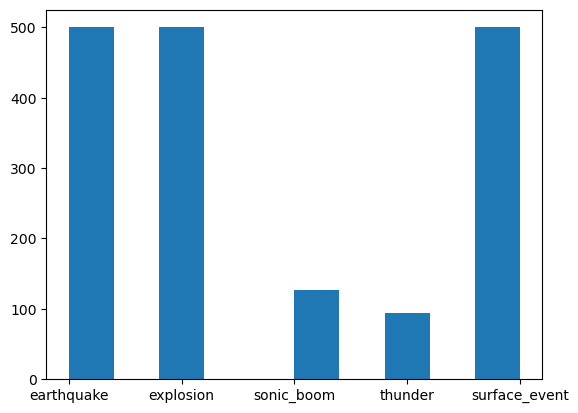

In [106]:
plt.hist(labels)

Now are read the data. It is stored in an HDF5 files under a finite number of groups. Each groups has an array of datasets that correspond to the waveforms. To link the metadata to the waveform files, the key trace_name has the dataset ID. The address is labeled as follows:
```
bucketX$i,:3,:n
```

where ``X`` is the HDF5 group number, ``i`` is the index. The file has typically 3 waveforms from each direction of ground motions N, E, Z. In the following exercise, we will focus on the vertical waveforms.

In [107]:
f = h5py.File("miniPNW_waveforms.hdf5", "r")

In [108]:
chan_list = ['N','E','Z']

Below a function to read the file in the data

In [109]:
def read_data(tn,f):
    """
    Function to read the waveform data from the .h5 file
    tn: trace_name of the waveform
    f: file object of the .h5 file
    """
    bucket, narray = tn.split('$')  # split the string of trace_name into bucket and narray
    x, y, z = iter([int(i) for i in narray.split(',:')]) # split the narray into x, y, z
    data = f['/data/%s' % bucket][x, :y, :z] # read the data as a 3D array
    return data

The trace name is stored as data attriobute in the metadata.

In [110]:
ldata=list(df['trace_name'])

In [111]:
ldata[0]

'bucket1$0,:3,:15001'

The first dimension of the data is 3
The second dimension of the data is 15001


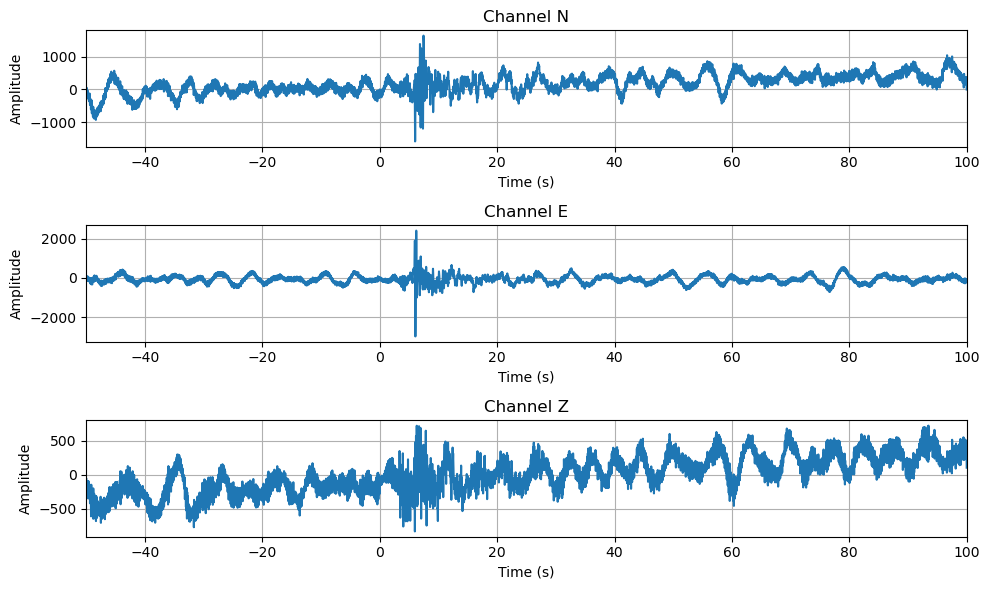

In [112]:
crap=read_data(ldata[530],f)
#print the dimension of a givan data
print(f'The first dimension of the data is {crap.shape[0]}')
print(f'The second dimension of the data is {crap.shape[1]}')

# the time vector of the data goes from 0 to 150 seconds with a sampling rate of 100Hz
t = np.linspace(-50, 100, crap.shape[1])

# plot an example of the data in a 3 row subplot
fig, ax = plt.subplots(3, 1, figsize=(10, 6))
for i in range(3):
    ax[i].plot(t,crap[i, :])
    ax[i].set_title(f'Channel {chan_list[i]}')
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Amplitude')
    ax[i].grid(True)
    ax[i].set_xlim(-50, 100)
plt.tight_layout()

We will just extract the Z component and reshape them into a single array.

In [113]:
nt=crap.shape[-1]
ndata=len(labels)
Z=np.zeros(shape=(ndata,nt))
for i in range(ndata-1):
    Z[i,:]=read_data(df.iloc[i]["trace_name"],f)[2,:nt]

Now we have data and its attributes, in particular the label as source type.

We are going to extract features automatically from tsfel and explore how varied the

In [114]:
!pip install tsfel
import tsfel


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


We need to format for input into tsfresh. It needs 1 column with the ``id`` (or label), one column for the time stamps (``sort``)

In [115]:
cfg = tsfel.get_features_by_domain()    
print(cfg)

{'spectral': {'FFT mean coefficient': {'complexity': 'constant', 'description': 'Computes the mean value of each spectrogram frequency.', 'function': 'tsfel.fft_mean_coeff', 'parameters': {'fs': 100, 'nfreq': 256}, 'n_features': 'nfreq', 'use': 'yes'}, 'Fundamental frequency': {'complexity': 'log', 'description': 'Computes the fundamental frequency.', 'function': 'tsfel.fundamental_frequency', 'parameters': {'fs': 100}, 'n_features': 1, 'use': 'yes'}, 'Human range energy': {'complexity': 'log', 'description': 'Computes the human range energy ratio given by the ratio between the energy in frequency 0.6-2.5Hz and the whole energy band.', 'function': 'tsfel.human_range_energy', 'parameters': {'fs': 100}, 'n_features': 1, 'use': 'yes', 'tag': 'inertial'}, 'LPCC': {'complexity': 'log', 'description': 'Computes the linear prediction cepstral coefficients.', 'function': 'tsfel.lpcc', 'parameters': {'n_coeff': 12}, 'n_features': 'n_coeff', 'use': 'yes', 'tag': 'audio'}, 'MFCC': {'complexity': 

In [116]:

print(f'We have a total of {Z.shape[0]} data sample and each has {Z.shape[1]} data poins')

We have a total of 1720 data sample and each has 15001 data poins


In [117]:
for i in range(10): #Z.shape[0]):
    print(f'Extracting features from sample {i}/{Z.shape[0]}')
    if i==0:
        X=tsfel.time_series_features_extractor(cfg, Z[i,:],fs=100., verbose = 0)
        X['source_type']=df.iloc[i]['source_type']
    else:
        XX = tsfel.time_series_features_extractor(cfg, Z[i,:],fs=100., verbose = 0)
        XX['source_type']=df.iloc[i]['source_type']
        X=pd.concat([XX,X],axis=0,ignore_index=True)


# change the column names to remove the prefix 0_
X.columns = X.columns.str.replace('0_', '')


Extracting features from sample 0/1720
Extracting features from sample 1/1720
Extracting features from sample 2/1720
Extracting features from sample 3/1720
Extracting features from sample 4/1720
Extracting features from sample 5/1720
Extracting features from sample 6/1720
Extracting features from sample 7/1720
Extracting features from sample 8/1720
Extracting features from sample 9/1720


In [118]:
X.head()

,Absolute energy,Area under the curve,Autocorrelation,Average power,Centroid,ECDF Percentile Count_0,ECDF Percentile Count_1,ECDF Percentile_0,ECDF Percentile_1,ECDF_0,...,Wavelet variance_1,Wavelet variance_2,Wavelet variance_3,Wavelet variance_4,Wavelet variance_5,Wavelet variance_6,Wavelet variance_7,Wavelet variance_8,Zero crossing rate,source_type
0,9.742864e+08,31207.637387,9.742864e+08,6.495243e+06,78.466491,3000.0,12000.0,-298.208729,151.301746,0.000067,...,1395.348318,2495.550398,3674.667437,5530.106304,8072.751642,11149.616998,14670.487177,18719.058340,235.0,earthquake
1,8.402399e+07,9063.005871,8.402399e+07,5.601600e+05,58.830080,3000.0,12000.0,-77.708776,48.153323,0.000067,...,921.217046,1395.363737,1567.561286,1256.932809,880.666612,682.995650,637.912389,674.893518,272.0,earthquake
2,9.015331e+07,6910.552647,9.015331e+07,6.010221e+05,63.002674,3000.0,12000.0,-29.206673,47.147688,0.000067,...,12754.759956,23536.460101,26033.368648,22937.003326,18408.577823,14822.361811,12640.580469,11471.174193,1085.0,earthquake
3,7.096144e+08,24553.426193,7.096144e+08,4.730763e+06,66.389598,3000.0,12000.0,-114.501055,213.176390,0.000067,...,27267.403246,55930.185792,66419.654741,64470.555161,60589.434231,58693.473343,60371.152906,66502.811011,803.0,earthquake
4,9.082897e+08,28869.941529,9.082897e+08,6.055265e+06,50.864641,3000.0,12000.0,-294.543856,38.136901,0.000067,...,5822.304317,10699.777184,15313.786784,17756.953569,18258.559868,18086.534963,17987.856997,18139.370933,1361.0,earthquake


In a general code, you may package this into a function. 

In [119]:
def calculate_features(Z):
    """
    Function to calculate features from the data
    Z: 2D array of seismic data data

    Returns:
    X: DataFrame of the features
    """
    for i in range(Z.shape[0]):
        print(f'Extracting features from sample {i}/{Z.shape[0]}')
        if i==0:
            X=tsfel.time_series_features_extractor(cfg, Z[i,:],fs=100., verbose = 0)
            X['source_type']=df.iloc[i]['source_type']
        else:
            XX = tsfel.time_series_features_extractor(cfg, Z[i,:],fs=100., verbose = 0)
            XX['source_type']=df.iloc[i]['source_type']
            X=pd.concat([XX,X],axis=0,ignore_index=True)

    # change the column names to remove the prefix 0_
    X.columns = X.columns.str.replace('0_', '')

    return X

In [120]:
# Calculate features from the seismic data and time it
import time
start = time.time()
X = calculate_features(Z)
end = time.time()
print(f'Time taken to calculate features: {end - start:.2f} seconds')

Extracting features from sample 0/1720
Extracting features from sample 1/1720
Extracting features from sample 2/1720
Extracting features from sample 3/1720
Extracting features from sample 4/1720
Extracting features from sample 5/1720
Extracting features from sample 6/1720
Extracting features from sample 7/1720
Extracting features from sample 8/1720
Extracting features from sample 9/1720
Extracting features from sample 10/1720
Extracting features from sample 11/1720
Extracting features from sample 12/1720
Extracting features from sample 13/1720
Extracting features from sample 14/1720
Extracting features from sample 15/1720
Extracting features from sample 16/1720
Extracting features from sample 17/1720
Extracting features from sample 18/1720
Extracting features from sample 19/1720
Extracting features from sample 20/1720
Extracting features from sample 21/1720
Extracting features from sample 22/1720
Extracting features from sample 23/1720
Extracting features from sample 24/1720
Extracting

In [121]:
X.head()

,Absolute energy,Area under the curve,Autocorrelation,Average power,Centroid,ECDF Percentile Count_0,ECDF Percentile Count_1,ECDF Percentile_0,ECDF Percentile_1,ECDF_0,...,Wavelet variance_1,Wavelet variance_2,Wavelet variance_3,Wavelet variance_4,Wavelet variance_5,Wavelet variance_6,Wavelet variance_7,Wavelet variance_8,Zero crossing rate,source_type
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.000067,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,surface_event
1,2.325603e+09,5.627850e+04,2.325603e+09,1.550402e+07,76.418530,3000.0,12000.0,292.999790,450.250905,0.000067,...,6.678689e+02,1.055538e+03,2.530908e+03,5.790352e+03,1.165462e+04,2.118641e+04,3.548474e+04,5.549514e+04,28.0,surface_event
2,8.705101e+11,7.477590e+05,8.705101e+11,5.803400e+09,74.967691,3000.0,12000.0,2434.988468,5493.021391,0.000067,...,9.263918e+07,2.386667e+08,2.936940e+08,2.466776e+08,1.717919e+08,1.109657e+08,6.954319e+07,4.344068e+07,258.0,surface_event
3,9.606099e+11,1.168706e+06,9.606099e+11,6.404066e+09,74.660640,3000.0,12000.0,-9228.169002,-6414.699254,0.000067,...,2.431281e+06,7.334504e+06,1.268369e+07,1.649068e+07,1.778231e+07,1.683463e+07,1.469724e+07,1.235497e+07,16.0,surface_event
4,3.595338e+11,7.343233e+05,3.595338e+11,2.396892e+09,74.976185,3000.0,12000.0,-4927.503218,-4863.251218,0.000067,...,4.896885e+03,1.023186e+04,1.774939e+04,2.750474e+04,3.936635e+04,5.330725e+04,6.934682e+04,8.750847e+04,0.0,surface_event


### New DataFrame Clean up

Removing the samples with NaN or Infinity


In [122]:
print(f'no of samples in the dataframe:{X.shape[0]}')
# Replace infinities with NaN
new_X = X.replace([np.inf, -np.inf], np.nan, inplace= False)

# Drop rows with NaN values
new_X = new_X.dropna(inplace= False)
print(f'no of samples in the new dataframe:{new_X.shape[0]}')

no of samples in the dataframe:1720
no of samples in the new dataframe:1717


In [123]:
X.head()

,Absolute energy,Area under the curve,Autocorrelation,Average power,Centroid,ECDF Percentile Count_0,ECDF Percentile Count_1,ECDF Percentile_0,ECDF Percentile_1,ECDF_0,...,Wavelet variance_1,Wavelet variance_2,Wavelet variance_3,Wavelet variance_4,Wavelet variance_5,Wavelet variance_6,Wavelet variance_7,Wavelet variance_8,Zero crossing rate,source_type
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.000067,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,surface_event
1,2.325603e+09,5.627850e+04,2.325603e+09,1.550402e+07,76.418530,3000.0,12000.0,292.999790,450.250905,0.000067,...,6.678689e+02,1.055538e+03,2.530908e+03,5.790352e+03,1.165462e+04,2.118641e+04,3.548474e+04,5.549514e+04,28.0,surface_event
2,8.705101e+11,7.477590e+05,8.705101e+11,5.803400e+09,74.967691,3000.0,12000.0,2434.988468,5493.021391,0.000067,...,9.263918e+07,2.386667e+08,2.936940e+08,2.466776e+08,1.717919e+08,1.109657e+08,6.954319e+07,4.344068e+07,258.0,surface_event
3,9.606099e+11,1.168706e+06,9.606099e+11,6.404066e+09,74.660640,3000.0,12000.0,-9228.169002,-6414.699254,0.000067,...,2.431281e+06,7.334504e+06,1.268369e+07,1.649068e+07,1.778231e+07,1.683463e+07,1.469724e+07,1.235497e+07,16.0,surface_event
4,3.595338e+11,7.343233e+05,3.595338e+11,2.396892e+09,74.976185,3000.0,12000.0,-4927.503218,-4863.251218,0.000067,...,4.896885e+03,1.023186e+04,1.774939e+04,2.750474e+04,3.936635e+04,5.330725e+04,6.934682e+04,8.750847e+04,0.0,surface_event


## Explore correlation  among features


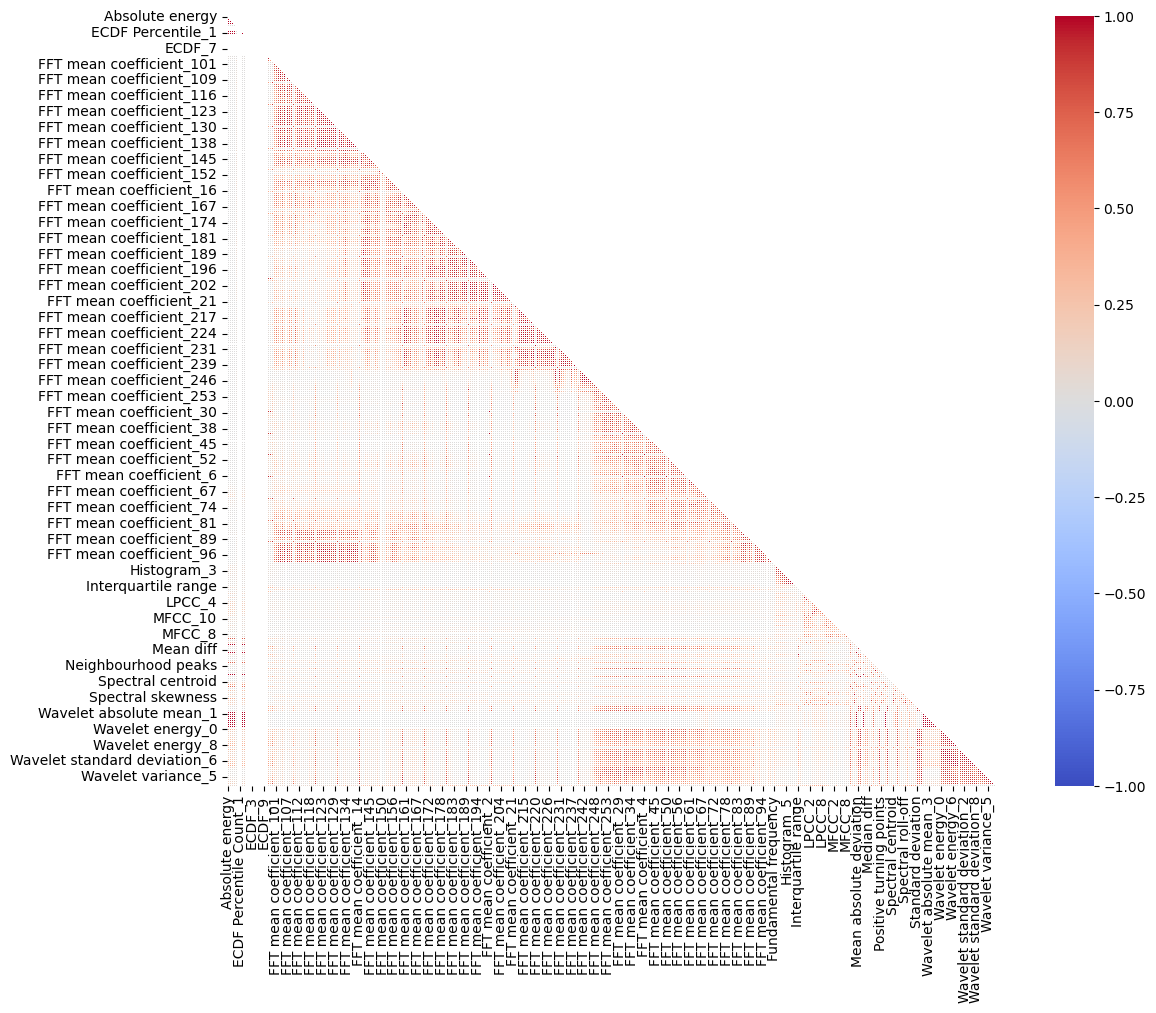

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute pairwise correlation of columns
corr_matrix = new_X.drop('source_type',axis=1).corr().abs()

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Draw the heatmap with the mask
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0, square=True, linewidths=.5, 
            #cbar_kws={"shrink": .5}, 
            annot= False)

plt.show()

## Exploring the feature space for classification purpose

Here we will plot distributions of certain features among the four classes. And we will explore what features are most correlated with each others in each of the categories.


In [126]:
def plot_feature_histograms(new_X, feature):
    # Get unique source types
    source_types = new_X['source_type'].unique()

    # Define colorblind-friendly palette
    colors = sns.color_palette('colorblind')

    for i, source_type in enumerate(source_types):
        # Select data for this source type
        data = new_X[new_X['source_type'] == source_type][feature]
        
        # Plot histogram for this source type
        plt.hist(np.log10(data), color=colors[i % len(colors)], alpha=0.5, label=source_type)

    # Add title
    plt.title(f'np.log10({feature})')
    
    # Add x-axis label
    plt.xlabel(f'np.log10({feature})')
    
    # Add y-axis label
    plt.ylabel('Count')
    
    # Add legend
    plt.legend()

    # Show plot
    plt.show()


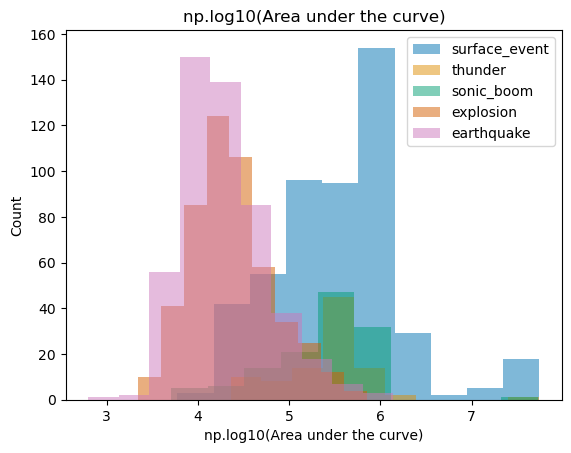

/Users/marinedenolle/opt/miniconda3/envs/mlgeo/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


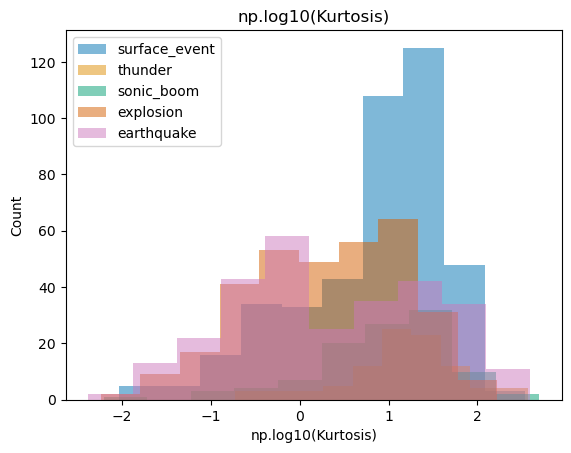

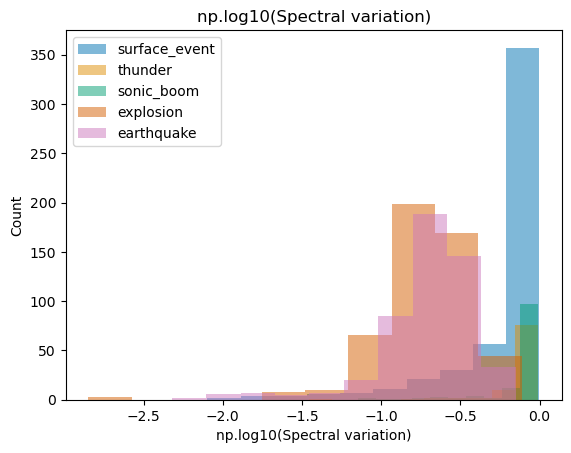

In [127]:

feature = 'Area under the curve'
plot_feature_histograms(new_X, feature)

feature = 'Kurtosis'
plot_feature_histograms(new_X, feature)

feature = 'Spectral variation'
plot_feature_histograms(new_X, feature)

### Student exercise

1. Which of the features will be best to classify among the event type classes?